   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65  
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


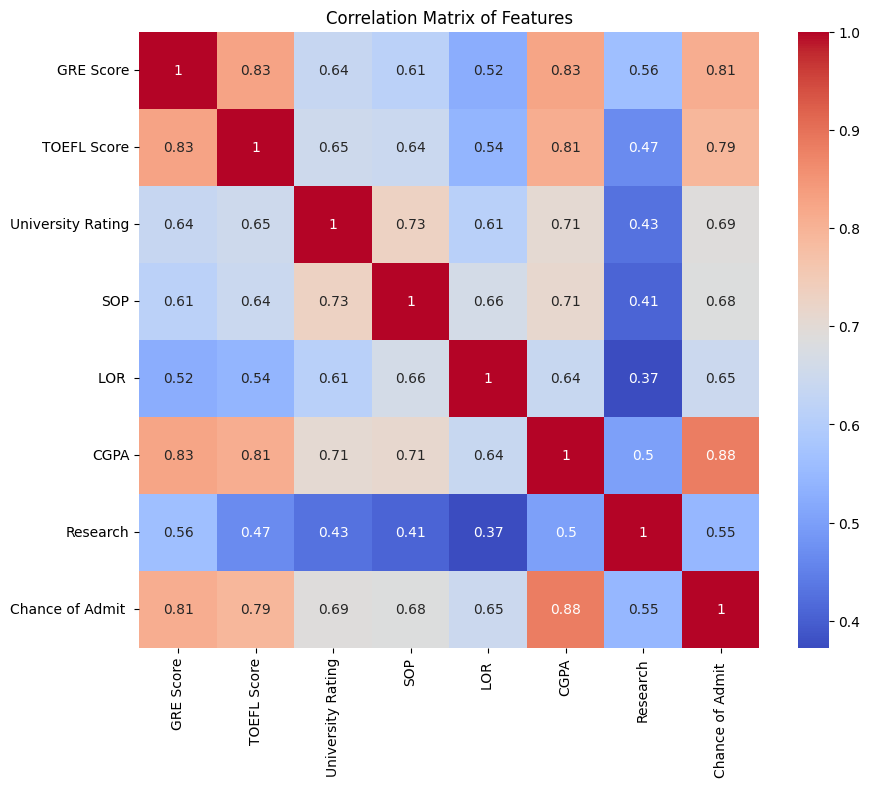

Logistic Regression Performance:
Train Accuracy: 0.95
Test Accuracy: 0.95

Confusion Matrix:
 [[ 4  5]
 [ 0 91]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.95      1.00      0.97        91

    accuracy                           0.95       100
   macro avg       0.97      0.72      0.79       100
weighted avg       0.95      0.95      0.94       100



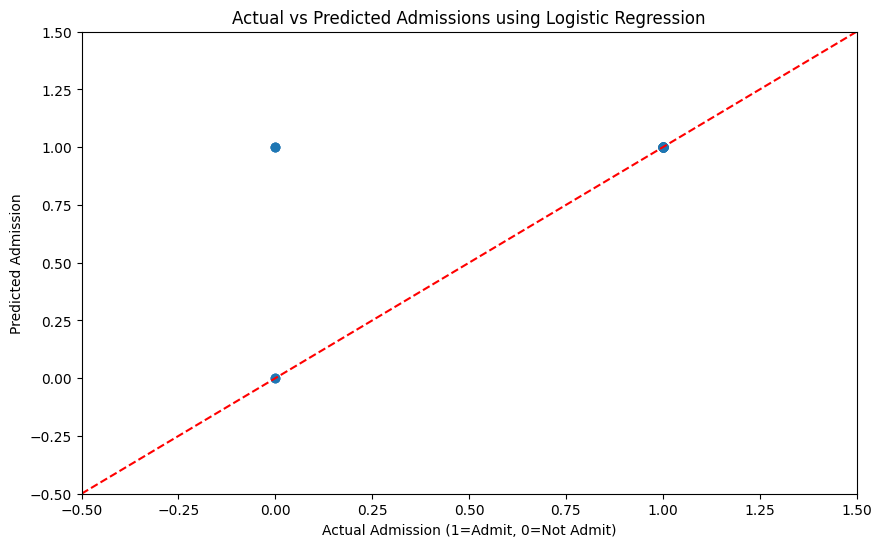


Enter your details below to predict your Chance of Admit:
Enter GRE Score (out of 340): 300
Enter TOEFL Score (out of 120): 110
Enter University Rating (out of 5): 4
Enter SOP Strength (out of 5): 4
Enter LOR Strength (out of 5): 4
Enter CGPA (out of 10): 9.2
Enter Research Experience (1 for Yes, 0 for No): 1

Predicted Result: You are likely to be admitted!


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('admission_data.csv')  # Adjust the path as necessary

# Display first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Drop any irrelevant columns if necessary
# data = data.drop(columns=['Serial No.'])

# Feature and target separation
X = data.drop(columns=['Chance of Admit '])
y = (data['Chance of Admit '] > 0.5).astype(int)  # Convert to binary classification

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model: Logistic Regression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

# Predictions using Logistic Regression
y_train_pred = log_reg_model.predict(X_train_scaled)
y_test_pred = log_reg_model.predict(X_test_scaled)

# Evaluate Logistic Regression model
print("Logistic Regression Performance:")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Visualization of Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel("Actual Admission (1=Admit, 0=Not Admit)")
plt.ylabel("Predicted Admission")
plt.title("Actual vs Predicted Admissions using Logistic Regression")
plt.plot([-0.5, 1.5], [-0.5, 1.5], color='red', linestyle='--')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

# Function to take user input and predict the admission chance
def get_user_input():
    print("\nEnter your details below to predict your Chance of Admit:")

    gre_score = float(input("Enter GRE Score (out of 340): "))
    toefl_score = float(input("Enter TOEFL Score (out of 120): "))
    university_rating = float(input("Enter University Rating (out of 5): "))
    sop_strength = float(input("Enter SOP Strength (out of 5): "))
    lor_strength = float(input("Enter LOR Strength (out of 5): "))
    cgpa = float(input("Enter CGPA (out of 10): "))
    research = int(input("Enter Research Experience (1 for Yes, 0 for No): "))

    user_data = pd.DataFrame({
        'GRE Score': [gre_score],
        'TOEFL Score': [toefl_score],
        'University Rating': [university_rating],
        'SOP': [sop_strength],
        'LOR ': [lor_strength],
        'CGPA': [cgpa],
        'Research': [research]
    })

    # Scale the user input data
    user_data_scaled = scaler.transform(user_data)

    # Predict the chance of admission using the trained model
    chance_of_admit = log_reg_model.predict(user_data_scaled)

    if chance_of_admit[0] == 1:
        print("\nPredicted Result: You are likely to be admitted!")
    else:
        print("\nPredicted Result: You are unlikely to be admitted.")

# Call the function to take user input and predict admission chances
get_user_input()
